In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
sns.set_theme(context="notebook", style="white")

In [4]:
pd.set_option("display.max_columns", 8)

# Overview

The dataset contains 3 data files:
* `data.csv`: the main data file.
* `stimuli.csv`: the description/listing of the stimuli.
* `demographic_info.csv`: the demographic information about the users.
* `data_incl_preliminary_exp.csv`: an additional data file that includes the user of the preliminary experiments.

# Data

`data.csv` contains the logs of the interaction with the self-teaching application used in [Nioche et al. (2021)](https://dl.acm.org/doi/10.1145/3397481.3450696). Each row corresponds to one trial. Here are the meaning of the columns:

* `user`: user ID (from $0$ to $n-1$ included), matches the ones used in `demographic_info.csv`.
* `character`: the kanji displayed for which the user needs to select the meaning.
* `meaning`: the corresponding meaning (the "right answer").
* `success`: did the user selects the right answer. Two possible values: `True`, `False`.
* `is_eval`: is the trial part of the evaluation session? Two possible values: `True`, `False`.
* `ts_display`: the timestamp of the display on the interface of the character, as the number of seconds elapsed since January, 1, 1970, 0:00:00 (UTC).
* `ts_reply`: the timestamp of the user reply on the interface, as the number of seconds elapsed since January, 1, 1970, 0:00:00 (UTC).
* `option0`: one of the possible answers displayed on the interface.
* `option1`: another possible answer displayed on the interface.
* `option2`: another possible answer displayed on the interface.
* `option3`: another possible answer displayed on the interface.
* `option4`: another possible answer displayed on the interface.
* `option5`: another possible answer displayed on the interface.
* `condition`: which experimental condition the user was in. Two possible values: `myopic`, `conservative`.
* `teacher`: what was the type of teacher selecting the item to show. Three possible values: `leitner` (baseline), `myopic`, `conservative`. Note that a single subject has only two possible teachers, either `leitner` and `myopic`, either `leitner` and `conservative`.
* `session`: the current teaching session. It is relative to the user *and* the teacher. Each user has 1 sessions per day and per teacher for one week (14 sessions in all). The last session for each teacher is an evaluation session. Possible values: $0$ to $6$ (included).

There are 53 different users. Each user completed between 1370 trials and 1608 trials. Each user saw between 85 and 204 items.

In [5]:
df = pd.read_csv("data.csv")
df

,user,character,meaning,success,...,condition,teacher,session,is_eval
0,0,嬢,miss,True,...,myopic,leitner,0,False
1,0,姉,older sister,True,...,myopic,leitner,0,False
2,0,婚,marriage,True,...,myopic,leitner,0,False
3,0,嬢,miss,True,...,myopic,leitner,0,False
4,0,姉,older sister,True,...,myopic,leitner,0,False
...,...,...,...,...,...,...,...,...,...
77631,52,明,bright,True,...,myopic,myopic,6,True
77632,52,複,duplicate,False,...,myopic,myopic,6,True
77633,52,舞,dance,True,...,myopic,myopic,6,True
77634,52,逃,escape,True,...,myopic,myopic,6,True


In [6]:
n_trials_per_user = df.user.value_counts()
f"Number of trials: {n_trials_per_user.mean():.2f} (+/- {n_trials_per_user.std():.2f} SD; " \
f"min={n_trials_per_user.min()}; max={n_trials_per_user.max()})"

'Number of trials: 1464.83 (+/- 59.88 SD; min=1370; max=1608)'

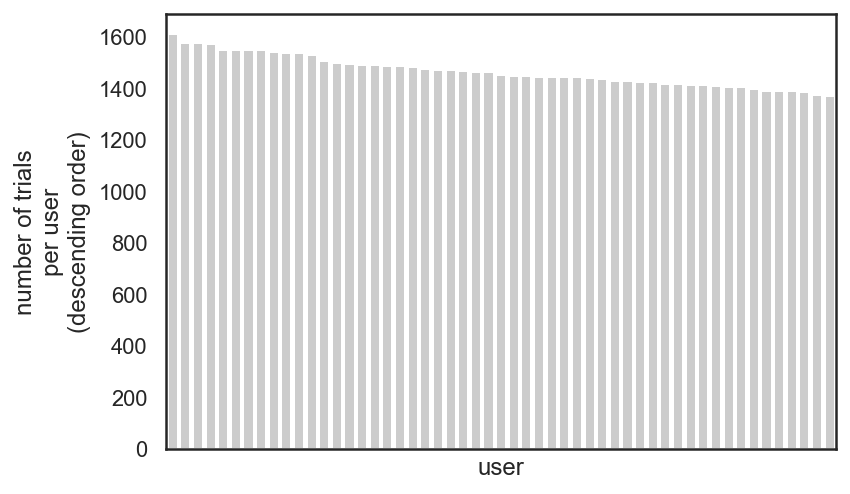

In [7]:
fig, ax = plt.subplots()
sns.countplot(data=df, x="user", order=df.user.value_counts().index, facecolor="0.8",)
ax.set_xticks([])
ax.set_ylabel("number of trials\nper user\n(descending order)");

Note that the number of trials is the same for each session ($n=100$), except the evaluation sessions.

In [8]:
n_item_per_user = df.groupby(["user"])["character"].nunique()
f"Number of items per user = {n_item_per_user.mean():.2f} (+/- {n_item_per_user.std():.2f} SD; " \
f"min={n_item_per_user.min()}; max={n_item_per_user.max()})"

'Number of items per user = 132.42 (+/- 29.94 SD; min=85; max=204)'

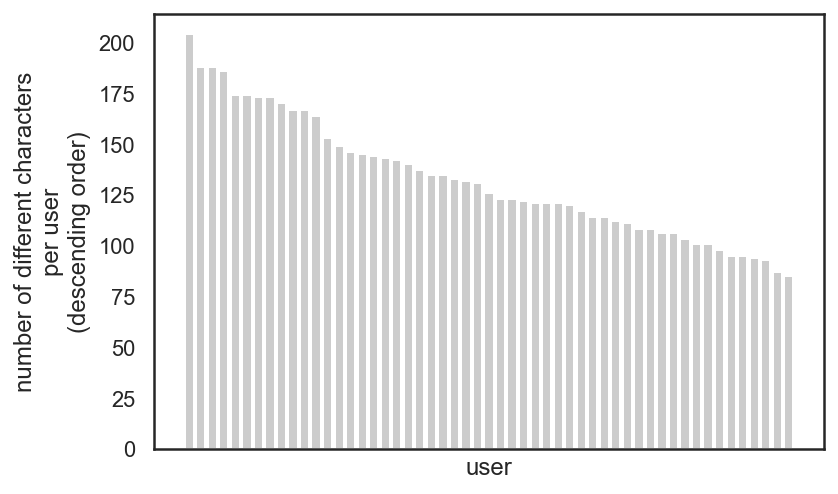

In [9]:
fig, ax = plt.subplots()
ax.bar(x=np.arange(len(n_item_per_user)), height=sorted(n_item_per_user, reverse=True), facecolor="0.8",)
ax.set_xticks([])
ax.set_xlabel("user")
ax.set_ylabel("number of different characters\nper user\n(descending order)");

# Stimuli

`stimuli.csv` contains the list of all the characters that the artificial teacher could select from. Each row corresponds to one character. Here are the meaning of the columns:

* `character`: kanji.
* `meaning`: meaning in English (note that it is only one possible meaning, as a kanji alone can point to several concepts in English).

In [10]:
df_stim = pd.read_csv("stimuli.csv")
df_stim

,character,meaning
0,上,above
1,三,three
2,山,mountain
3,入,enter
4,七,seven
...,...,...
2050,唄,shamisen song
2051,漸,gradually
2052,慕,yearn for
2053,升,grid


# Demographic information

`demographic_info.csv` contains the demographic information for the users in `data.csv`. Each row corresponds to one user. Here are the meaning of the columns:

* `user`: user ID (from 0 to $n-1$), matches the ones used in `data.csv`.
* `gender`: gender (self-reported). Take one of the following values: `M` (male), `F` (female), `O` (other).
* `age`: age (in years).
* `native_lang`: native language (self-reported). If several languages, separated by a space.
* `other_lang`: other spoken languages. If several languages, separated by a space.

In [11]:
df_demo = pd.read_csv("demographic_info.csv")
df_demo

,user,gender,age,native_lang,other_lang
0,0,M,19,finnish,english swedish german
1,1,M,30,urdu,english
2,2,F,26,finnish,english swedish german
3,3,M,20,finnish,english french swedish
4,4,F,20,finnish,english swedish
5,5,F,29,finnish,english
6,6,F,23,swedish,finnish english
7,7,F,19,swedish,finnish english french
8,8,F,25,finnish,english swedish german russian french estonian
9,9,F,27,finnish,english italian swedish spanish french


In [12]:
f"age = {df_demo.age.mean():.2f} (+/- {df_demo.age.std():.2f} SD)"

'age = 26.38 (+/- 7.75 SD)'

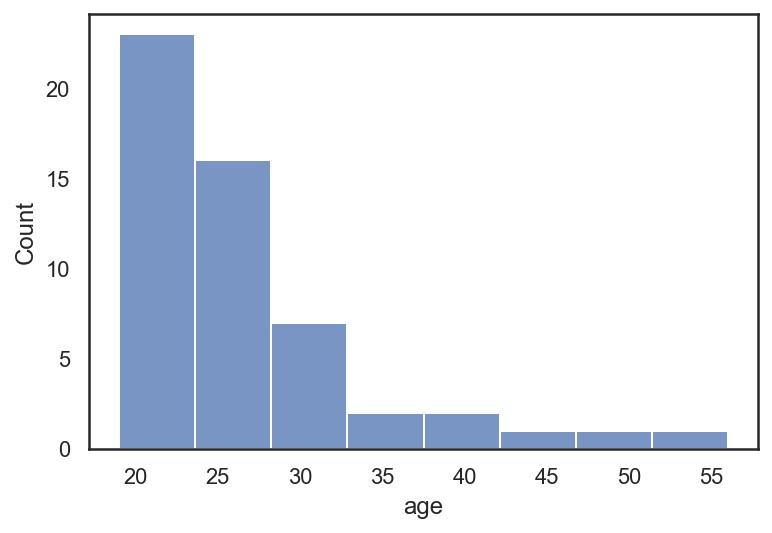

In [13]:
sns.histplot(data=df_demo, x="age");

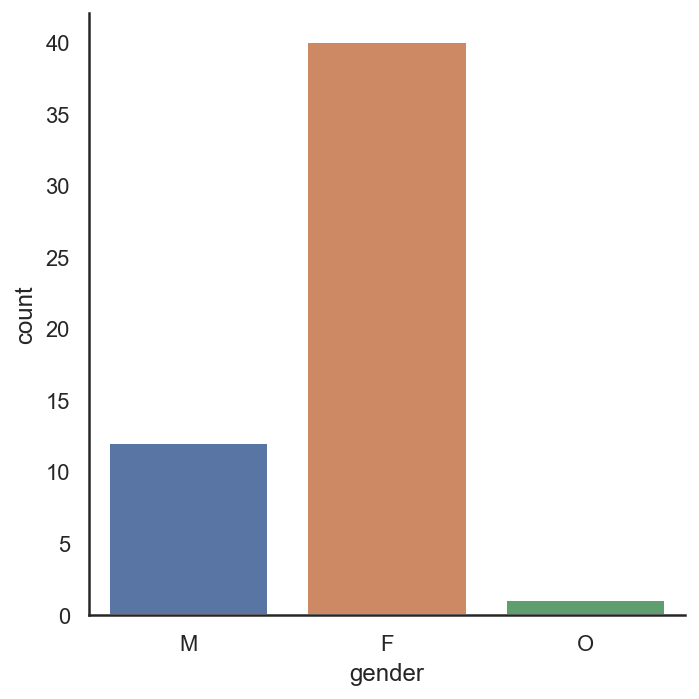

In [14]:
sns.catplot(data=df_demo, kind="count", x="gender");

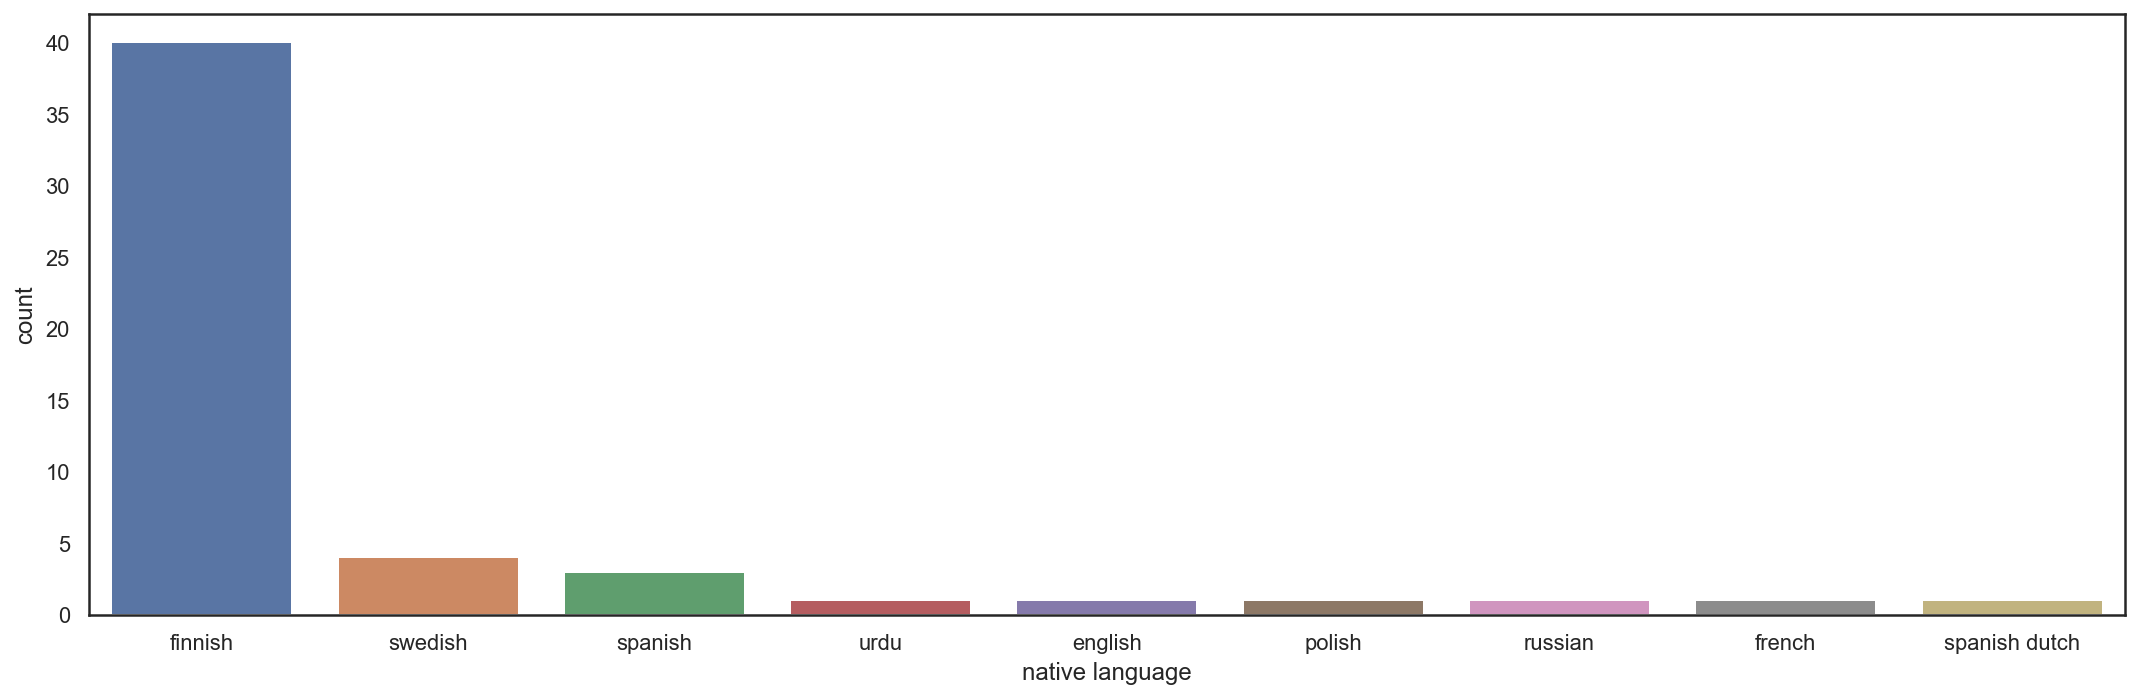

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(data=df_demo, x="native_lang", ax=ax, order=df_demo.native_lang.value_counts().index)
ax.set_xlabel("native language")

plt.tight_layout();

# Additional data

`data_incl_preliminary_exp.csv` contains the data from `data.csv` and additional data that comes from the preliminary experiments done to test the material before the experiment described in [Nioche et al. (2021)](https://dl.acm.org/doi/10.1145/3397481.3450696), and the data from users that are incomplete (missing sessions, etc.). This file has for columns:
* `user`: user ID (from `s0` to `s<n-1>` included). The 's' stands for 'supplemental', and is here to highlight that there is *no* matching with the user ID used in the other files.
* `character`: the kanji displayed for which the user needs to select the meaning.
* `meaning`: the corresponding meaning (the "right answer").
* `success`: did the user selects the right answer. Two possible values: `True`, `False`.
* `is_eval`: is the trial part of the evaluation session? Two possible values: `True`, `False`.
* `ts_display`: the timestamp of the display on the interface of the character, as the number of seconds elapsed since January, 1, 1970, 0:00:00 (UTC).
* `ts_reply`: the timestamp of the user reply on the interface, as the number of seconds elapsed since January, 1, 1970, 0:00:00 (UTC).
* `option0`: one of the possible answers displayed on the interface.
* `option1`: another possible answer displayed on the interface.
* `option2`: another possible answer displayed on the interface.
* `option3`: another possible answer displayed on the interface.
* `option4`: another possible answer displayed on the interface.
* `option5`: another possible answer displayed on the interface.

In [16]:
df_add = pd.read_csv("data_incl_preliminary_exp.csv")
df_add

,user,character,meaning,success,...,option2,option3,option4,option5
0,s0,老,elderly,True,...,nourishing,obstruct,old woman,thunder
1,s0,局,bureau,True,...,highness,leg,old woman,slippery
2,s0,拠,based on,True,...,claw,elderly,government,vip
3,s0,握,grip,True,...,domesticate,elderly,grip,leg
4,s0,濃,thick,True,...,elderly,grip,prolong,thick
...,...,...,...,...,...,...,...,...,...
148811,s106,羊,sheep,True,...,renew,sheep,territory,torso
148812,s106,示,indicate,True,...,indicate,present time,radiance,throw
148813,s106,懸,suspend,True,...,sell,sheep,suspend,throw
148814,s106,願,request,False,...,compare,diagnose,request,two mat area


# Example of data manipulation to extract time elapsed between two repetitions of an item, and the number of repetition

In [17]:
df = pd.read_csv("data.csv")

In [18]:
# Copy actual item ID in a new column
df["item_id"] = pd.factorize(df.character)[0]
# Create new ids starting from zero
for i, i_id in enumerate(df.item_id.unique()):
    df.loc[df.item_id == i_id, 'item'] = i

# Total number of user
n_u = len(df.user.unique())

# Number of observations per user
n_o_by_u = np.zeros(shape=n_u, dtype=int)
for u, (user, user_df) in enumerate(df.groupby("user")):
    # Do not count first presentation
    n_o_by_u[u] = len(user_df) - len(user_df.item.unique()) 

# Total number of observation
n_obs = n_o_by_u.sum()

In [19]:
# Prepare data containers

# Replies (1: success, 0: error)
y = np.zeros(shape=n_obs, dtype=int)
# Time elapsed since the last presentation of the same item (in seconds)
x = np.zeros(shape=n_obs, dtype=float)
# Number of repetition (number of presentation - 1)
r = np.zeros(shape=n_obs, dtype=int)
# Item ID
w = np.zeros(shape=n_obs, dtype=int)
# User ID
u = np.zeros(shape=n_obs, dtype=int)

In [20]:
# Fill the containers `y`, `x`, `r`, `w`, `u` 
idx = 0
for i_u, (user, user_df) in enumerate(df.groupby("user")):
    
    # Extract data from user `u`
    user_df = user_df.sort_values(by="ts_reply")
    seen = user_df.item.unique()
    w_u = user_df.item.values
    ts_u = user_df.ts_reply.values
    y_u = user_df.success.values
    
    # Initialize counts of repetition for each words at -1
    counts = {word: -1 for word in seen}
    # Initialize time of last presentation at None
    last_pres = {word: None for word in seen}
    
    # Number of observations for user `u` including first presentations
    n_obs_u_incl_first = len(user_df)
    
    # Number of repetitions for user `u`
    r_u = np.zeros(n_obs_u_incl_first)
    # Time elapsed since last repetition for user `u`
    x_u = np.zeros(n_obs_u_incl_first)  
    
    # Loop over each entry for user `u`:
    for i in range(n_obs_u_incl_first):
        
        # Get info for iteration `i`
        word = w_u[i]
        ts = ts_u[i]
        r_u[i] = counts[word]
        
        # Compute time elasped since last presentation
        if last_pres[word] is not None:
            x_u[i] = ts - last_pres[word]
        
        # Update count of repetition
        counts[word] += 1
        # Update last presentation
        last_pres[word] = ts
    
    # Keep only observations that are not the first presentation of an item
    to_keep = r_u >= 0
    y_u = y_u[to_keep]
    r_u = r_u[to_keep]
    w_u = w_u[to_keep]
    x_u = x_u[to_keep]
    
    # Number of observations for user `u` excluding first presentations
    n_obs_u = len(y_u)
    
    # Fill containers
    y[idx:idx + n_obs_u] = y_u
    x[idx:idx + n_obs_u] = x_u
    w[idx:idx + n_obs_u] = w_u
    r[idx:idx + n_obs_u] = r_u
    u[idx:idx + n_obs_u] = i_u
    
    # Update index
    idx += n_obs_u

In [21]:
n_w = len(np.unique(w))
n_o_max = n_o_by_u.max()
n_o_min = n_o_by_u.min()
print("number of user", n_u)
print("number of items", n_w)
print("total number of observations (excluding first presentation)", n_obs)
print("minimum number of observation for a single user", n_o_min)
print("maximum number of observation for a single user", n_o_max)

pd.DataFrame({
    'u': u,  # User ID
    'w': w,  # Item ID
    'x': x,  # Time elapsed since the last presentation of the same item (in seconds)
    'r': r,  # Number of repetition (number of presentation - 1)
    'y': y   # Replies (0: error, 1: success)
})

number of user 53
number of items 1998
total number of observations (excluding first presentation) 70618
minimum number of observation for a single user 1285
maximum number of observation for a single user 1404


,u,w,x,r,y
0,0,0,9.164,0,1
1,0,1,9.567,0,1
2,0,2,10.232,0,1
3,0,0,16.394,1,1
4,0,1,19.229,1,1
...,...,...,...,...,...
70613,52,103,863.901,4,1
70614,52,1349,895.155,15,0
70615,52,563,930.642,6,1
70616,52,202,874.870,3,1


In [22]:
# Average number of repetitions
r.mean()

6.4676711320060045

In [23]:
# Correct recall frequency
y.mean()

0.8626837350250645

In [24]:
# Minimum/Maximum time between two presentations (in seconds)
x.min(), x.max()

(1.7849996089935303, 476175.66499996185)